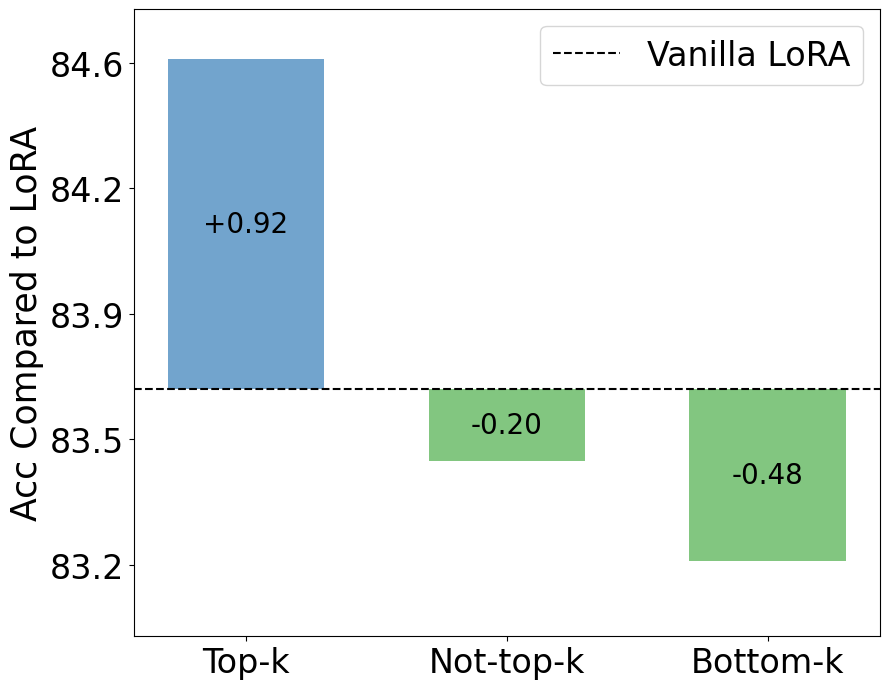

In [7]:
# Provide the code for the user
import matplotlib.pyplot as plt
import numpy as np

# Remove the "Dense" column from the data
methods = ['Top-k', 'Not-top-k', 'Bottom-k']
values = [83.69, 84.61, 83.49, 83.21]
diffs = [0, 0.92, -0.2, -0.48]
bar_width = 0.6
values = values[1:]
diffs = diffs[1:]
index = np.linspace(0, len(methods) - 1, len(methods))
color_positive_diff = '#377eb8'     # red
color_negative_diff = '#4daf4a'    # blue

# Adjusting the plot after removing the "Dense" column
fig, ax = plt.subplots(figsize=(9, 7))

# Drawing the dashed line for Dense's result
dense_value = 83.69
ax.axhline(y=dense_value, color='black', linestyle='--', label='Vanilla LoRA')

# Bars for differences from Dense
for i, diff in enumerate(diffs):
    if diff > 0:  # Positive difference
        # 调高亮度
        ax.bar(index[i], diff, bar_width, bottom=dense_value, color=color_positive_diff, alpha=0.7)
        ax.text(index[i], dense_value + diff / 2, f"+{diff:.2f}", ha='center', va='center', color='black', fontsize=20)
    elif diff < 0:  # Negative difference
        ax.bar(index[i], -diff, bar_width, bottom=dense_value + diff, color=color_negative_diff, alpha=0.7)
        ax.text(index[i], dense_value + diff / 2, f"{diff:.2f}", ha='center', va='center', color='black', fontsize=20)

# Label, title, and legend
# ax.set_xlabel('Method', fontsize=14)
ax.set_ylabel('Acc Compared to LoRA', fontsize=25)
# ax.set_title('Expert Selection Variants', fontsize=22)
ax.set_xticks(index)
ax.set_xticklabels(methods, fontsize=24)

# Adjust y-axis range
ax.set_ylim(83, 84.75)
ax.set_yticks(np.linspace(83.2, 84.6, 5))
ax.set_yticklabels([f"{i:.1f}" for i in ax.get_yticks()], fontsize=24)
ax.legend(fontsize=24)

plt.tight_layout()
plt.savefig('diff.pdf', bbox_inches='tight', pad_inches=0)
plt.show()
